In [21]:
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np

from tensorflow import keras
from keras import layers
from keras.models import Sequential
import pathlib
from tensorflow.keras.preprocessing import image, image_dataset_from_directory
print(tf.__version__)

2.10.0


In [28]:
train_path=pathlib.Path('train_data/')
test_path=pathlib.Path('test_data/')
train_path

WindowsPath('train_data')

In [29]:
batch_size = 32 # image_batch представляет собой
                # тензор формы (32, 32, 32, 3).
                # Это пакет из 32 изображений размером 32x32x3
                # (последний размер относится к цветовым каналам RGB)
img_height = 32
img_width = 32

train_ds = tf.keras.utils.image_dataset_from_directory(
    train_path,  #для обучения
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
    test_path,  #для тестирования
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 1600 files belonging to 3 classes.
Found 681 files belonging to 3 classes.


In [30]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'rose', 'sun']


In [31]:
AUTOTUNE = tf.data.AUTOTUNE  #Dataset.cache хранит изображения в памяти после их загрузки с диска в течение первой эпохи.
#Dataset.prefetch перекрывает предварительную обработку данных и выполнение модели во время обучения.

In [32]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [39]:
num_classes = len(class_names)
print(num_classes)

3


In [65]:
#Используем последовательную модель, каждый слой имеет ровно один тензор входной и один выходной тензор
model = Sequential([
#    data_augmentation,
    layers.Rescaling(1. / 255), # Слои масштабирования
    layers.Conv2D(16, 3, padding='same', activation='relu',input_shape =(32,32,3)), #Добавления операции свертки^ на выходе 16 признаков изображения, 3 размер ядра свертки(3х3)
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='sigmoid'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(), #всего пулинг — это извлечение максимума/среднего элементов,
                           # попадающих под окно пулинга (область фиксированноо размера, например, окно 2х2).
    layers.Dropout(0.2), # Отключит нейрон с вероятностью 0.2
    layers.Flatten(), #Flatten, преобразует формат изображений из двумерного массива в одномерный массив.
    layers.Dense(128, activation='relu'), #полносвязный слой
                                        # ( tf.keras.layers.Dense ) со 128 единицами поверх него,
                                        # который активируется функцией активации ReLU ( 'relu' )
    layers.Dense(3, name="outputs")
])

In [66]:
model.compile(optimizer='adam', #оптимизатор
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), #функция потерь
              metrics=['accuracy'])

Epoch 1/15
50/50 [==============================] - 1s 19ms/step - loss: 1.1234 - accuracy: 0.3406 - val_loss: 1.0980 - val_accuracy: 0.3201
Epoch 2/15
50/50 [==============================] - 1s 17ms/step - loss: 1.0716 - accuracy: 0.4106 - val_loss: 1.1075 - val_accuracy: 0.3935
Epoch 3/15
50/50 [==============================] - 1s 17ms/step - loss: 0.9956 - accuracy: 0.4850 - val_loss: 0.9762 - val_accuracy: 0.5022
Epoch 4/15
50/50 [==============================] - 1s 16ms/step - loss: 0.8495 - accuracy: 0.5681 - val_loss: 0.8485 - val_accuracy: 0.6094
Epoch 5/15
50/50 [==============================] - 1s 17ms/step - loss: 0.7584 - accuracy: 0.6562 - val_loss: 0.7652 - val_accuracy: 0.6417
Epoch 6/15
50/50 [==============================] - 1s 17ms/step - loss: 0.6463 - accuracy: 0.7225 - val_loss: 0.6941 - val_accuracy: 0.6975
Epoch 7/15
50/50 [==============================] - 1s 17ms/step - loss: 0.5967 - accuracy: 0.7487 - val_loss: 0.6597 - val_accuracy: 0.7430
Epoch 8/15
50

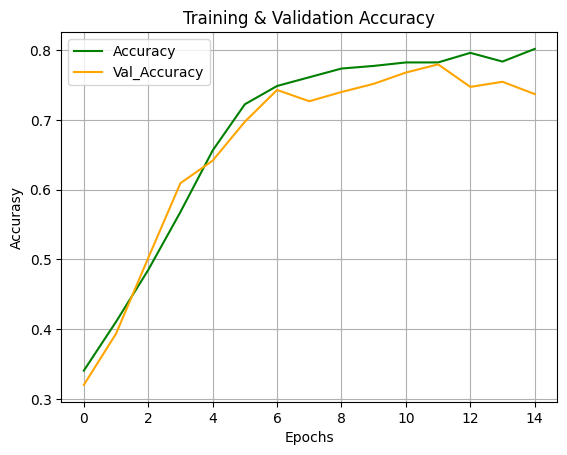

50/50 [==============================] - 0s 5ms/step - loss: 0.4805 - accuracy: 0.7912

Training loss: 0.4805258512496948

Training accuracy: 0.7912499904632568


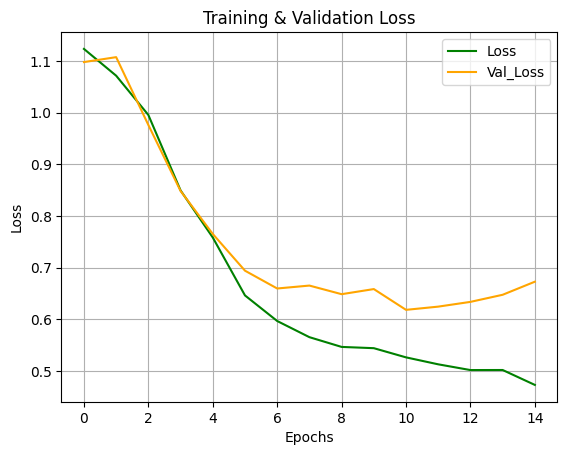

22/22 [==============================] - 0s 5ms/step - loss: 0.6728 - accuracy: 0.7372

Test loss: 0.6728324890136719

Test accuracy: 0.7371512651443481


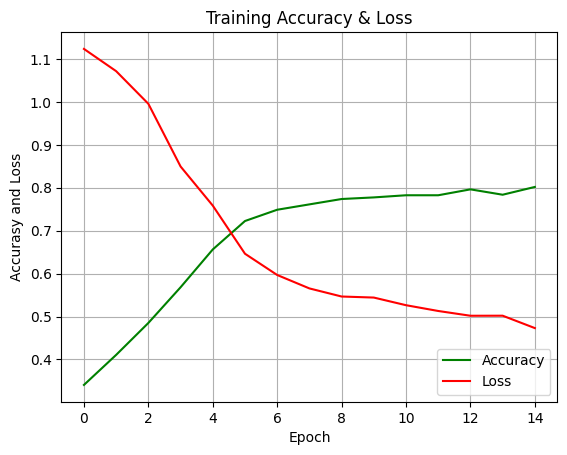

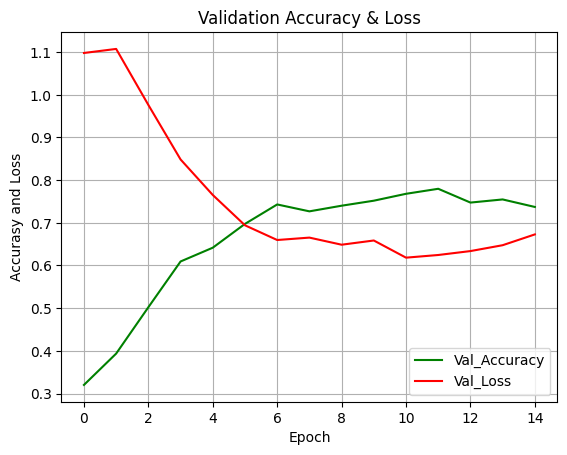

In [67]:
trainHistory = model.fit(x = train_ds, validation_data = val_ds, epochs = 15)

plt.title('Training & Validation Accuracy')
plt.plot(trainHistory.history['accuracy'], 'green',label='Accuracy')
plt.plot(trainHistory.history['val_accuracy'], 'orange',label='Val_Accuracy')
plt.ylabel('Accurasy')
plt.xlabel('Epochs')
plt.legend(loc='upper left')
plt.grid()
plt.show()

(loss, accuracy) = model.evaluate(train_ds)
print('\nTraining loss:', loss)
print('\nTraining accuracy:', accuracy)

plt.title('Training & Validation Loss')
plt.plot(trainHistory.history['loss'],'green',label='Loss')
plt.plot(trainHistory.history['val_loss'],'orange',label='Val_Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(loc='upper right')
plt.grid()
plt.show()

(loss, accuracy) = model.evaluate(val_ds)
print('\nTest loss:', loss)
print('\nTest accuracy:', accuracy)

plt.plot(trainHistory.history['accuracy'],'green',label='Accuracy')
plt.plot(trainHistory.history['loss'],'red',label='Loss')
plt.title('Training Accuracy & Loss')
plt.ylabel('Accurasy and Loss')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.grid()
plt.show()

plt.plot(trainHistory.history['val_accuracy'],'green',label='Val_Accuracy')
plt.plot(trainHistory.history['val_loss'],'red',label='Val_Loss')
plt.title('Validation Accuracy & Loss')
plt.ylabel('Accurasy and Loss')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.grid()
plt.show()

model.save("model_flowers5.h5")

In [68]:
model = keras.models.load_model("model_flowers5.h5")

In [69]:
test_img = image.load_img('test_data/sun/14925398441_107f3e0304_n.jpg', target_size = (img_height, img_width))
img = image.img_to_array(test_img)
img = np.expand_dims(img, axis = 0)
class_names = ['daisy', 'rose', 'sunflower']
#img_height = 180
#img_width = 180

predictions = model.predict(img)
score = tf.nn.softmax(predictions)

# class_name = keras.np_utils.probas_to_classes(predictions)

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)
print(score)

1/1 [==============================] - 0s 71ms/step
This image most likely belongs to sunflower with a 77.84 percent confidence.
tf.Tensor([[0.21332985 0.00829553 0.77837455]], shape=(1, 3), dtype=float32)


In [76]:
doggy_path = "test_data/rose/12338444334_72fcc2fc58_m.jpg"


class_names = ['daisy', 'rose', 'sunflower']
img_height = 32
img_width = 32

img = tf.keras.utils.load_img(
    doggy_path, target_size=(img_height, img_width)

)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "Это изображение, скорее всего, принадлежит к {} с достоверностью {:.2f} процентов."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)


1/1 [==============================] - 0s 20ms/step
Это изображение, скорее всего, принадлежит к rose с достоверностью 91.08 процентов.


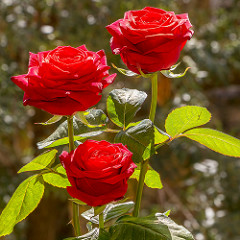

In [75]:
image.load_img('test_data/rose/12338444334_72fcc2fc58_m.jpg')

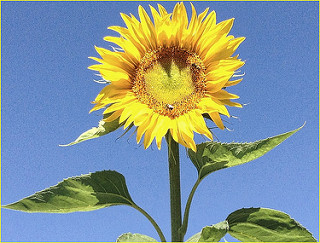

In [74]:
image.load_img('test_data/sun/14925398441_107f3e0304_n.jpg')